<a href="https://colab.research.google.com/github/nanangyudi/2020pds_d/blob/main/Arya_Rizky_Sandi_205150409111002_(Tugas_Akhir).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TAHAP #1 deskripsi tujuan bisnis

## 1. Untuk melakukan prediksi apakah pasien penyakit jantung meninggal atau tidak saat dalam perawatan berdasarkan riwayat kesehatan pasien

## TAHAP #2 analisa pendekatan yang akan dilakukan
##Analisa pendekatan yang akan dilakukan
# Analisis prediktif dengan model klasifikasi 
# Klasifikasi model merupakan teknik dalam data mining untuk mengelompokkan data berdasarkan keterikatan data terhadap data sampel

##TAHAP #3 PENGUMPULAN DATA
Data didapatkan di website kaggle yang merupakan
Kaggle merupakan website komunitas data sains terbesar di dunia, selain itu menyediakan dan sumber daya (data-data) untuk membantu pembelajaran data sains
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data 


##TAHAP #4 pemahaman terhadap data yang telah dikumpulkan

Penyakit kardiovaskular (CVD) adalah penyebab kematian nomor 1 secara global, mengambil sekitar 17,9 juta nyawa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia.
Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan dataset ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat penyakit ini berdasarkan riwayat kesehatan pasien saat dalam perawatan.

Kolom-kolom yang ada pada
Age = umur

Anemia = sedang mengidap anemia (1 = ya, 0 = tidak)

Creatinine_phosphokinase = level adanya CPK enzim pada darah (mcg/L ) || [23...7861]

Diabetes = apakah dia pengidap diabetes (1 = ya, 0 = tidak)

ejection_fraction = presentase darah yang dipompa keluar

high_blood_pressure = apakah dia pengidap hipertensi (1 = ya, 0 = tidak)

platelets = jumlah trombosit pada darah (kiloplatelets/mL) || [25.01,…, 850.00]

serum_creatinine = Level of creatinine in the blood   (mg/dL) || [0.50,…, 9.40] 

serum_sodium = Level of sodium in the blood    (mEq/L) || [114,…, 148] 

sex = jenis kelamin (wanita = 0, pria = 1)

smoking = apakah ia perokok? (tidak = 0, ya =1)

time = Follow-up period // ditindak lanjuti berapa hari // waktu dirawat

DEATH_EVENT = If the patient died during the follow-up period // pasien meninggal saat sedang perawatan (0 = tidak, 1 = ya)


##TAHAP #5 eksplorasi data

In [ ]:
##TAHAP 5 eksplorasi data
import pandas as pd
## panda adalah library untuk pengelolaan data atau dataframe
import numpy as np
## numpy adalah library untuk perhitungan matematis
import matplotlib.pyplot as plt
## matplotlib adalah library untuk membuat plot dan visualisasi data
import seaborn as sns
sns.set(style='whitegrid')
np.random.seed(0)
## seaborn adalah library untuk visualisasi data
from sklearn.preprocessing import MinMaxScaler
!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [ ]:
### import data dan menampilkan
path = "https://raw.githubusercontent.com/arrsandi/import-csv-jantung/main/heart_failure_clinical_records_dataset.csv"
data = pd.read_csv(path)
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
## analisis deskripsi (statistik) dari data
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

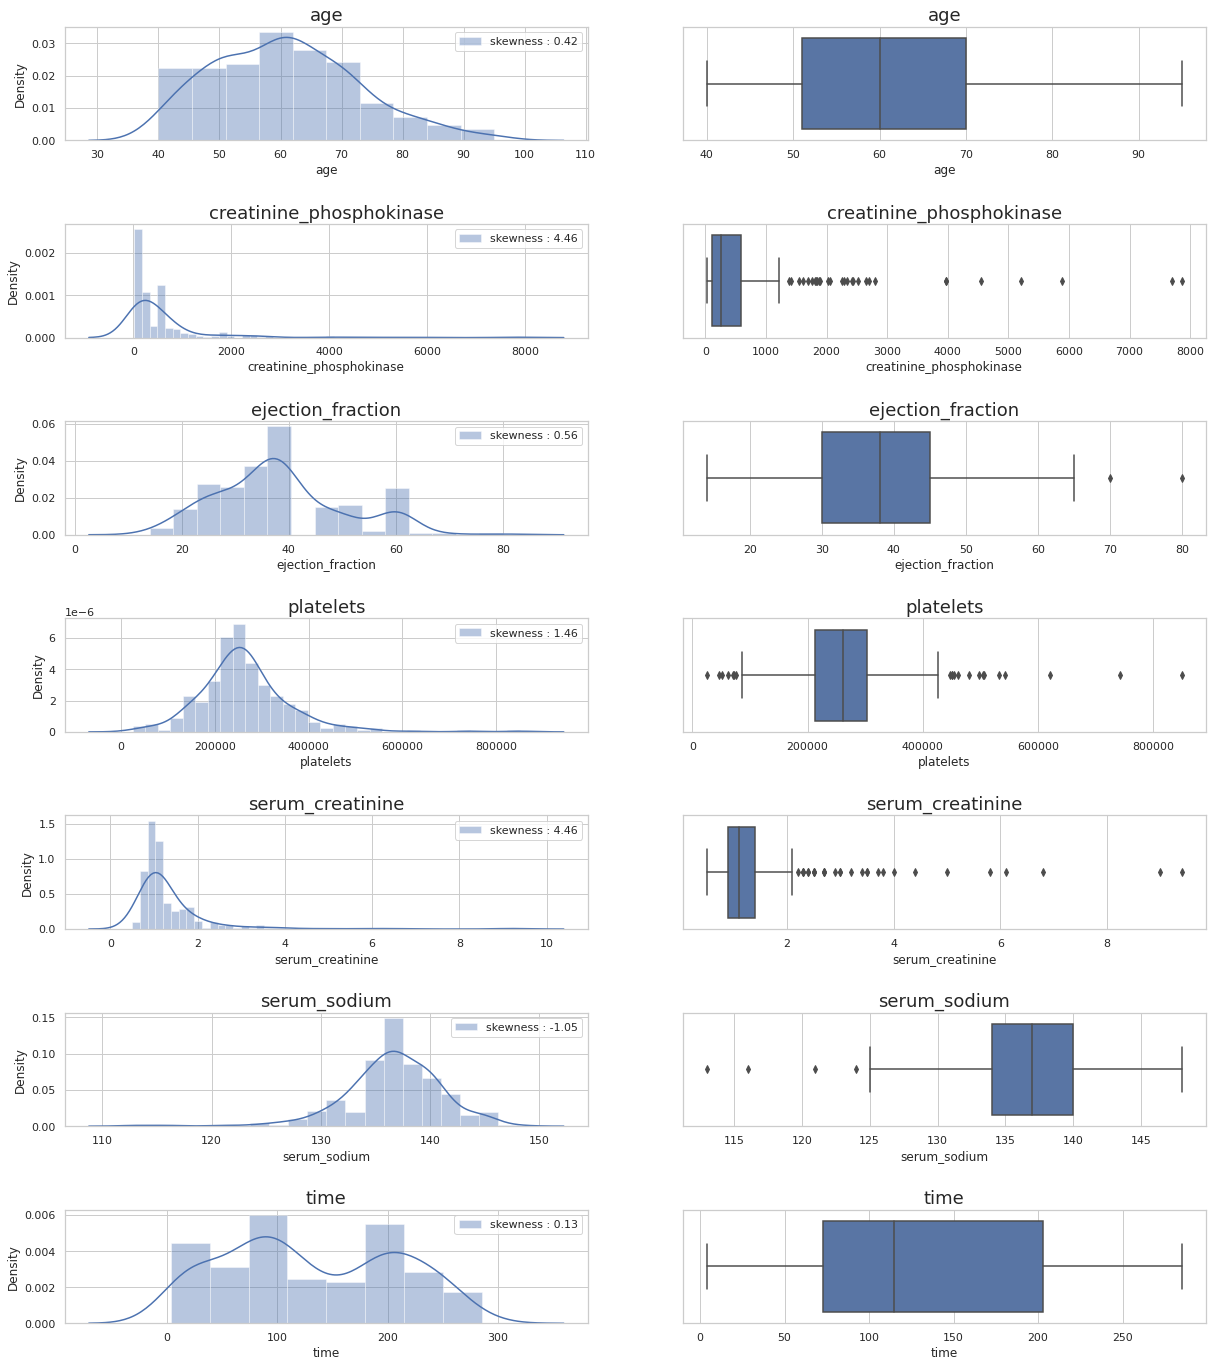

In [ ]:
## mengetahui data tersebut terdistribusi secara normal atau tidak
## dan untuk mengetahui ada outlier atau tidak

num_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
fig, ax =plt.subplots(7,2, figsize=(18,20))
fig.tight_layout(pad=5.0)


for i, col in enumerate(num_columns):
    sns.distplot(ax = ax[i,0], a = data[col].dropna(), label = 'skewness : %.2f'%(data[col].skew()))
    ax[i,0].set_title(col, fontsize = 18)
    ax[i,0].legend(loc = 'best')
    
    sns.boxplot(ax = ax[i, 1], x = data[col].dropna())
    ax[i, 1].set_title(col, fontsize = 18)
plt.show()

##grafik kiri menunjukkan distribusi data
## grafik kanan menunjukkan adanya outlier

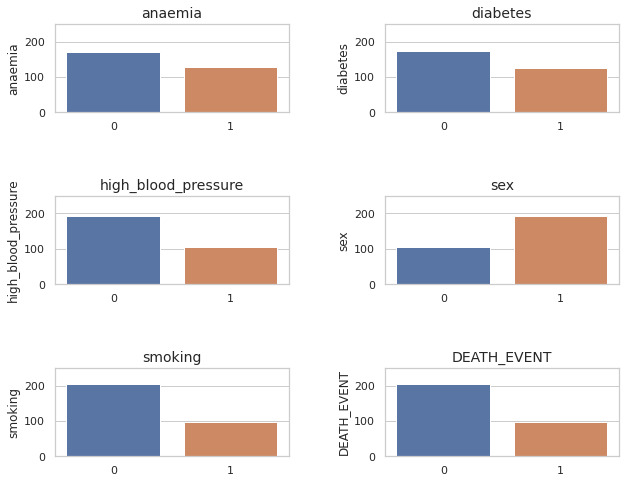

In [ ]:
## eksplorasi kolom/fitur yang bertipe data boolean

cat_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
fig, ax = plt.subplots(3,2, figsize = (10, 8))
fig.tight_layout(pad = 5.0)

for ax, col in zip(ax.flatten(), cat_columns):
    index = data[col].fillna('NaN').value_counts().index
    counts = data[col].fillna('NaN').value_counts()
    sns.barplot(ax = ax, x = index, y = counts)
    ax.set_title(col, fontsize = 14)
    ax.set_ylim(0, 250)

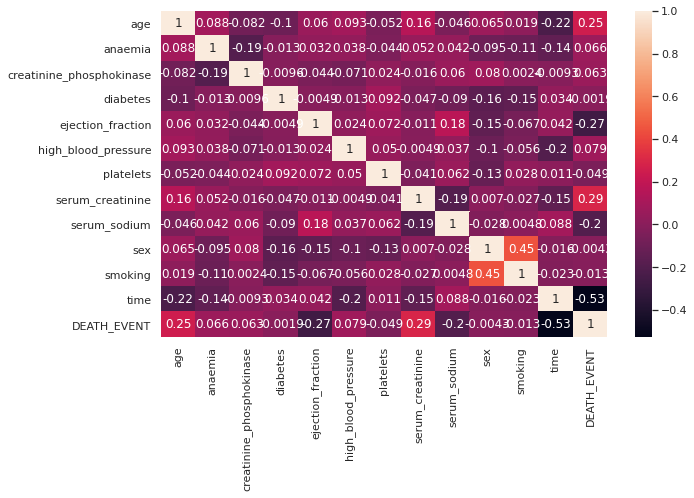

In [ ]:
##mengetahui korelasi antara satu kolom dengan kolom yang lain

heatmapdata = data
cormat = heatmapdata.corr()
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(ax = ax, data = cormat, annot = True)
plt.show()

In [ ]:
#tambahan informasi

## kolom "smoking" dan "sex" memiliki korelasi yang paling tinggi


In [ ]:
#mengatasi distribusi data yg tidak normal dan data outlier (data cleaning)

#mengatasi distribusi data yg tidak normal  dengan transformasi log
data['creatinine_phosphokinase'] = np.log1p(data['creatinine_phosphokinase'])
data['platelets'] = np.log1p(data['platelets'])
data['serum_creatinine'] = np.log1p(data['serum_creatinine'])
data['serum_sodium'] = np.log1p(data['serum_sodium'])

# mengatasi outlier data dengan mengganti data outlier (nilai yang diluar dari batas maksimum dan minimum pada boxplot) dengan nilai median
for i, col in enumerate(num_columns):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    data.loc[((data[col] < (q1 - 1.5 * iqr)) | (data[col] > (q3+1.5*iqr))), col] = data[col].median()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

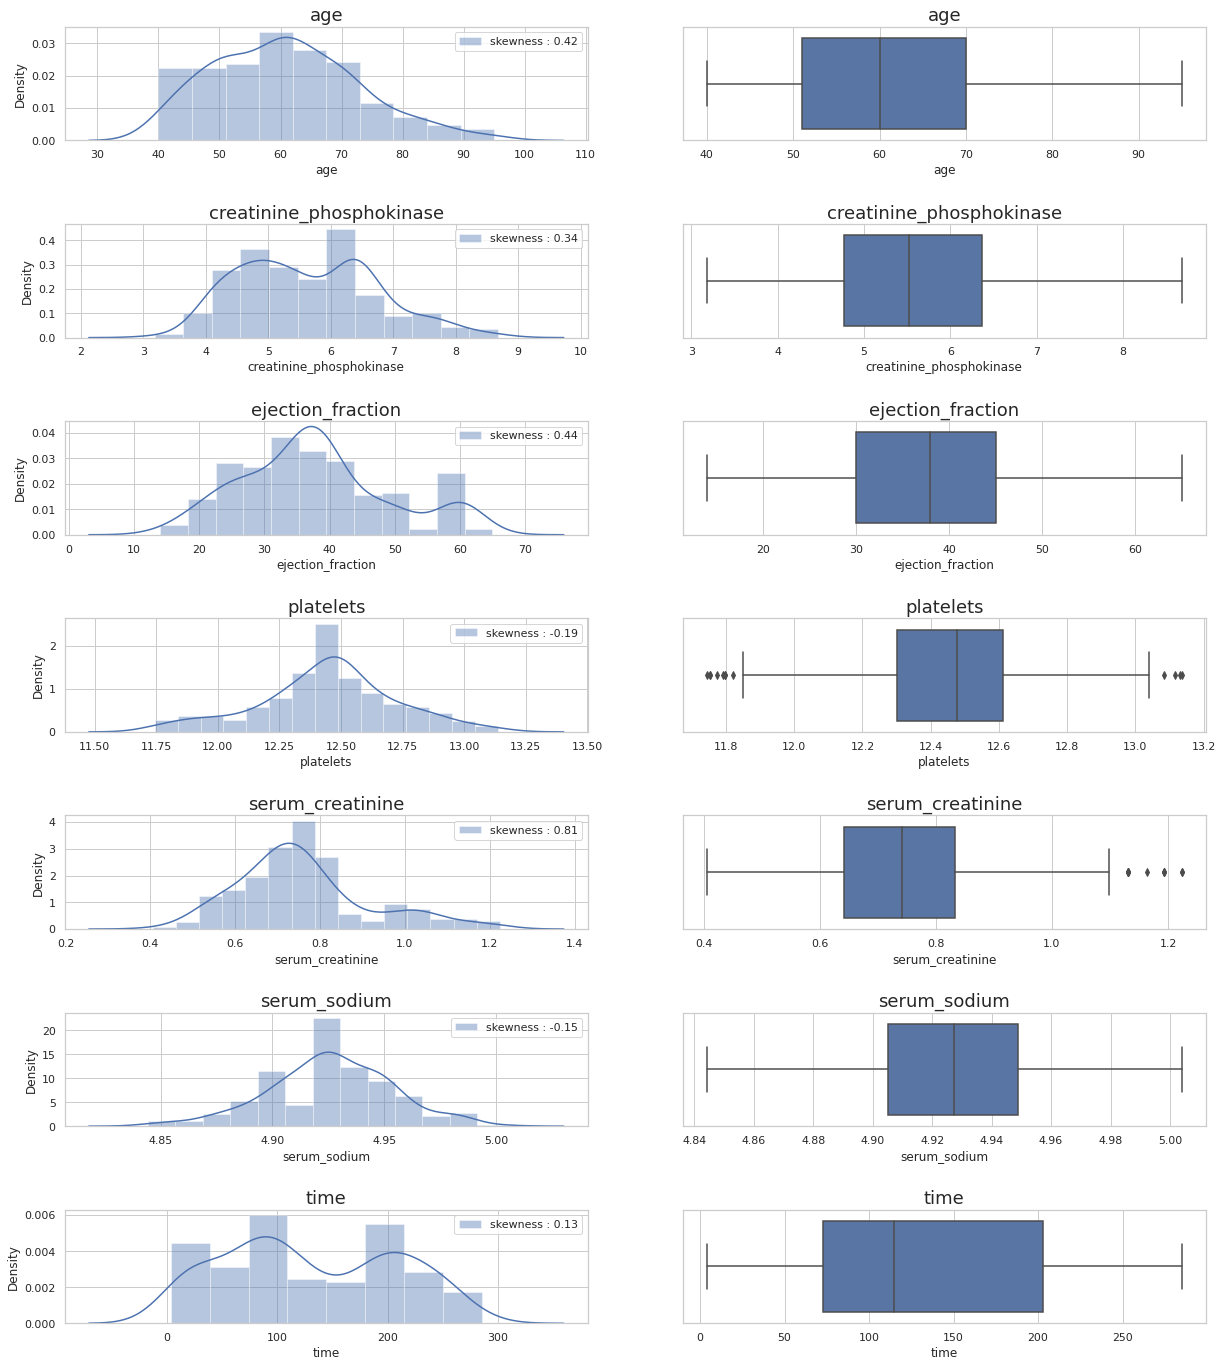

In [ ]:
##hasil data setelah ditransformasi log dan dibersihkan dari outlier

fig, ax =plt.subplots(7,2, figsize=(18,20))
fig.tight_layout(pad=5.0)
for i, n in enumerate(num_columns):
    sns.distplot(ax = ax[i,0], a = data[n].dropna(), label = 'skewness : %.2f'%(data[n].skew()))
    ax[i,0].set_title(n, fontsize = 18)
    ax[i,0].legend(loc = 'best')
    
    sns.boxplot(ax = ax[i, 1], x = data[n].dropna())
    ax[i, 1].set_title(n, fontsize = 18)
plt.show()

In [ ]:
##setelah dilakuakn transformasi log dan dibersihkan dari outlier
##distribusi data menjadi lebih normal dan lebih bersih

In [ ]:
##melakukan normalisasi data agar data di setiap kolomnya mempunyai scale atau rentang yang sama(0-1)
sc = MinMaxScaler()

sc.fit(data[num_columns]) ##khusus data numerik saja
data[num_columns] = sc.transform(data[num_columns])

In [ ]:
data[num_columns].head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,0.636364,0.579838,0.117647,0.533998,0.805618,0.194106,0.000000
1,0.272727,0.426663,0.470588,0.529533,0.411179,0.474425,0.007117
2,0.454545,0.329418,0.117647,0.180512,0.522350,0.146141,0.010676
3,0.181818,0.279991,0.117647,0.366911,0.805618,0.519949,0.010676
4,0.454545,0.345953,0.117647,0.685000,0.411179,0.519949,0.014235


In [ ]:
##Partisi Data ( data latih = 80%, data uji = 20% )
##Data latih digunakan untuk melatih model
##Data uji digunakan untuk evaluasi model atau mengetahui peforma dari model
## 0:12 = kolom ke 0 sampai 11
## 12 = kolom terakhir
X = data.iloc[:, 0:12].values
y = data.iloc[:, 12]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('X_test shape :', X_test.shape)
print('y_test shape :', y_test.shape)

X_train shape : (239, 12)
y_train shape : (239,)
X_test shape : (60, 12)
y_test shape : (60,)


In [ ]:

##SMOTE (Synthetic Minority Over-sampling Technique)
# Dikarenakan nilai variable target tidak imbang (nilai 0 ada 166 baris data, sedangkan nilai 1 hanya 73 baris data), maka dilakukan metode SMOTE untuk menyeimbangkan nilai tersebut
X_train_smote, y_train_smote = SMOTE().fit_sample(X_train, y_train)
print('Hasil perbandingan nilai pada variable target setelah dilakukan metode SMOTE \n', pd.Series(y_train_smote).value_counts())

Hasil perbandingan nilai pada variable target setelah dilakukan metode SMOTE 
 1    166
0    166
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


##TAHAP #6 MODELING DATA

Di tahap ini, saya menggunakan model decision tree untuk mengklasifikasi  apakah pasien penyakit jantung meninggal saat perawatan berdasarkan riwayat kesehatan pasien.

Decision tree adalah salah satu metode klasifikasi yang paling populer, karena mudah untuk diinterpretasi oleh manusia. Decision tree adalah model prediksi menggunakan struktur pohon atau struktur berhirarki.

Konsep dari pohon keputusan adalah mengubah data menjadi decision tree dan aturan-aturan keputusan. Manfaat utama dari penggunaan decision tree adalah kemampuannya untuk mem-break down proses pengambilan keputusan yang kompleks menjadi lebih simple, sehingga pengambil keputusan akan lebih menginterpretasikan solusi dari permasalahan.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Menggunakan cross_val_score dengan 10 fold
clf = DecisionTreeClassifier()
accuracies = cross_val_score(clf, X = X_train_smote, y = y_train_smote, cv = 10)
print(accuracies)
print('AVG:',accuracies.mean())
print('STD/variance:',accuracies.std())

[0.85294118 0.85294118 0.6969697  0.87878788 0.75757576 0.78787879
 0.75757576 0.81818182 0.84848485 0.90909091]
AVG: 0.8160427807486631
STD/variance: 0.061792672172514364


In [ ]:
##jadi, model klasifikasi yang sudah dibuat menghasilkan nilai rata-rata akurasi
##sekitar 0.816

##jadi, menurut saya sudah cukup bagus dalam melakukan klasifikasi

##Tahap #7 EVALUASI


In [ ]:
##saya melakukan evaluasi model terhadap data tes yang sudah dipartisi

clf = DecisionTreeClassifier()
clf.fit(X_train_smote, y_train_smote)
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0])

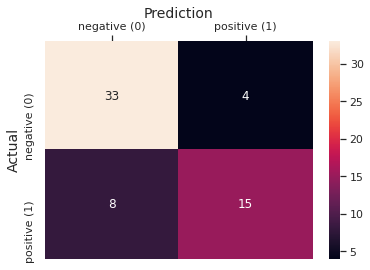

In [ ]:
## visualisasi matriks confusion

fig, ax = plt.subplots(figsize = (6,4))
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = y_pred), fmt = 'g', annot = True)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediction', fontsize = 14)
ax.set_xticklabels(['negative (0)', 'positive (1)'])
ax.set_ylabel('Actual', fontsize = 14)
ax.set_yticklabels(['negative (0)', 'positive (1)'])
plt.show()

In [ ]:
##berarti model bisa menghasilkan prediksi pasien masih hidup dengan benar sebesar 33 pasien
## bisa memprediksi pasien yang meninggal dengan benar sebesar 15 pasien
## hasil prediksi yang salah 4 + 8 = 12 pasien

In [ ]:
##mengetahui akurasi, recall, dan tingkat presisi dari model
## akurasi = Merupakan rasio prediksi Benar (positif dan negatif) dengan keseluruhan data.
##Berapa persen pasien penyakit jantung yang meninggal dalam perawatan berdasarkan riwayat kesehatan pasien
## benar diprediksi meninggal dan  tidak meninggal dari kesuluruhan pasien gagal jantung

##precision = Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf.
##Precission menjawab pertanyaan “Berapa persen pasien yang benar meninggal
##dari keseluruhan pasien yang diprediksi meninggal?” 


##recall = Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif. 
## Recall menjawab pertanyaan “Berapa persen pasien 
## yang diprediksi meninggal dibandingkan keseluruhan pasien yang sebenarnya meninggal”.

conf_matrix = confusion_matrix(y_test, y_pred)
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]

accuracy = (tp+tn)/(tp+tn+fp+fn)
recall = tp/(tp+fn)
precission = tp/(tp+fp)

print('Accuracy : ', round(accuracy, 4))
print('Recall : ', round(recall, 4))
print('Precission :', round(precission, 4))

Accuracy :  0.8
Recall :  0.6522
Precission : 0.7895


In [ ]:
##hasil evaluasi model pada data tes adalah
## untuk accuracy sekitar 0.8
## untuk  recall sekitar 0.6522
## untuk precission sekitar 0.7895

